In [1]:
import glob
import pickle
import numpy as np

In [9]:
print("Optim & Dataset & mtype & err")
for dtype in ["mnist"]:
    for mtype in ["lenet"]:
        print(f"{dtype} & {mtype} &", end=' ')
        for optim in ["sgd","sam_sgd","entropy_sgd","fsgd"]:
            errs = []
            for fol in glob.glob(f"checkpoints/{dtype}/{mtype}/{optim}/*"):
                with open(f"{fol}/measure.pkl", "rb") as f:
                    mtr = pickle.load(f)
                errs.append(mtr['err'])
            print(f"{np.mean(errs):0.3f} + {np.std(errs):0.3f} &", end=' ')
        print('')

for dtype in ["cifar10", "cifar100"]:
    for mtype in ["resnet18", "resnet50", "resnet101"]:
        print(f"{dtype} & {mtype} &", end=' ')
        for optim in ["sgd","sam_sgd","entropy_sgd","fsgd"]:
            errs = []
            for fol in glob.glob(f"checkpoints/{dtype}/{mtype}/{optim}/run_ms_*/run0/"):
                with open(f"{fol}/measure.pkl", "rb") as f:
                    mtr = pickle.load(f)
                errs.append(mtr['err'])
            print(f"{np.mean(errs):0.3f} + {np.std(errs):0.3f} &", end=' ')
        print('')
for dtype in ["tinyimagenet"]:
    for mtype in ["resnet18"]:
        print(f"{dtype} & {mtype} &", end=' ')
        for optim in ["sgd","sam_sgd","entropy_sgd","fsgd"]:
            errs = []
            for fol in glob.glob(f"checkpoints/{dtype}/{mtype}/{optim}/run_ms_*/run0/"):
                with open(f"{fol}/measure.pkl", "rb") as f:
                    mtr = pickle.load(f)
                errs.append(mtr['err'])
            print(f"{np.mean(errs):0.3f} + {np.std(errs):0.3f} &", end=' ')
        print('')

        for optim in ["sgd", "sam_sgd", "fsgd"]:
    for dtype in ["imagenet"]:
        for mtype in ["resnet18"]:
            errs = []
            for fol in glob.glob(f"checkpoints/{dtype}/{mtype}/{optim}/*"):
                with open(f"{fol}/measure.pkl", "rb") as f:
                    mtr = pickle.load(f)
                errs.append(mtr['err'])
            print(f"{optim} & {dtype} & {mtype} & {np.mean(errs):0.3f} + {np.std(errs):0.3f}")

Optim & Dataset & mtype & err
mnist & lenet & 0.646 + 0.025 & 0.626 + 0.029 & 0.776 + 0.029 & 0.598 + 0.023 & 
cifar10 & resnet18 & 11.490 + 0.393 & 9.998 + 0.165 & nan + nan & 9.044 + 0.185 & 
cifar10 & resnet50 & 10.212 + 0.433 & 8.812 + 0.319 & nan + nan & 8.602 + 0.138 & 
cifar10 & resnet101 & 9.492 + 0.483 & 8.328 + 0.305 & nan + nan & 8.692 + 0.128 & 
cifar100 & resnet18 & 38.286 + 0.308 & 36.168 + 0.206 & nan + nan & 30.022 + 0.249 & 
cifar100 & resnet50 & 35.552 + 1.111 & 33.150 + 1.078 & nan + nan & 30.642 + 0.505 & 
cifar100 & resnet101 & 32.876 + 0.525 & 30.806 + 0.396 & nan + nan & 29.972 + 0.370 & 
tinyimagenet & resnet18 & 64.142 + 0.085 & 63.148 + 0.361 & nan + nan & 59.124 + 0.267 & 


In [2]:
%matplotlib inline

In [6]:
import torch
from matplotlib import pyplot as plt

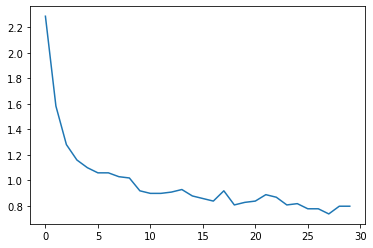

In [7]:
data = torch.load('checkpoints/mnist/lenet/esgd/run_ms_0/run0/all_data.pth.tar')
plt.plot(data['valerr'])

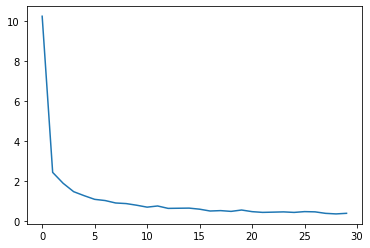

In [8]:
plt.plot(data['trainerr'])